# SalesPulse: Data Ingestion & Quality Assessment
## Notebook 1 of 4

This notebook covers:
1. Loading raw sales data from multiple sources
2. Comprehensive data quality assessment
3. Quality report generation
4. Initial data profiling

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os

# Add src to path
sys.path.append('../src')

from data_quality import DataQualityChecker

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Load Superstore Sales Data

In [2]:
superstore_path = '../data/raw/superstore_final_dataset.csv'
df_superstore = pd.read_csv(superstore_path, encoding='ISO-8859-1')

print(f"Superstore Sales Data Loaded")
print(f"Shape: {df_superstore.shape}")
print(f"\nFirst few rows:")
df_superstore.head()

Superstore Sales Data Loaded
Shape: (9800, 18)

First few rows:


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [3]:
# Basic information
print("=== Superstore Data Info ===")
df_superstore.info()

=== Superstore Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non

In [4]:
# Quick statistical summary
df_superstore.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## 2. Quality Assessment - Superstore

In [5]:
# Initialize quality checker
qc_superstore = DataQualityChecker(df_superstore, "Superstore Sales")

# Run comprehensive quality check
report_superstore = qc_superstore.run_full_quality_check()

In [6]:
# Display missing values
print("\n=== Missing Values ===")
if len(report_superstore['missing_values']) > 0:
    display(report_superstore['missing_values'])
else:
    print("No missing values detected!")


=== Missing Values ===


,Column,Missing_Count,Missing_Percentage,Data_Type
11,Postal_Code,11,0.112245,float64


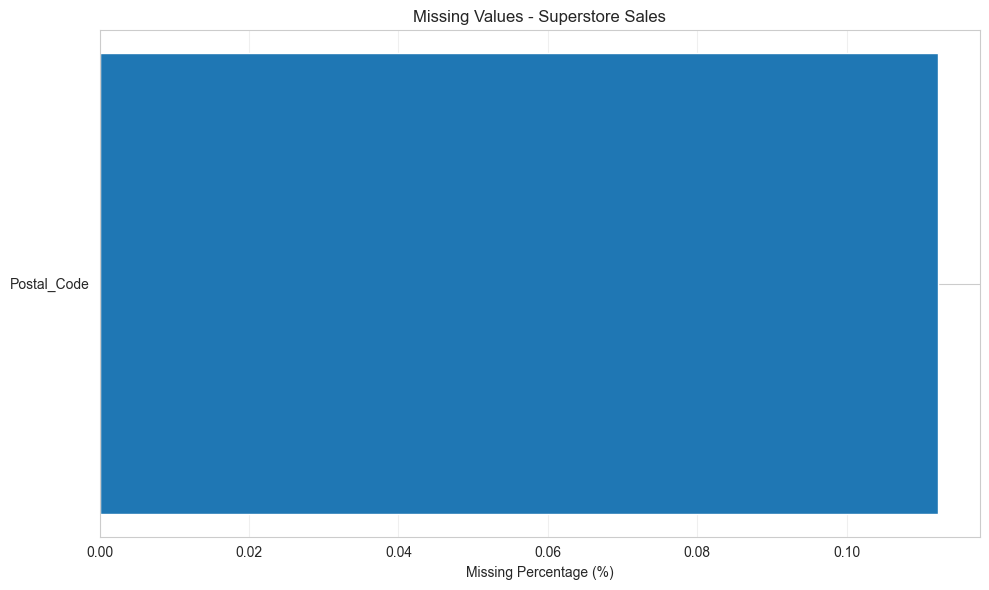

In [7]:
# Visualize missing values
fig = qc_superstore.plot_missing_values()
if fig:
    plt.show()
else:
    print("No missing values to visualize")

In [8]:
# Display duplicate information
print("\n=== Duplicate Rows ===")
dup_info = report_superstore['duplicates']
print(f"Total Duplicates: {dup_info['total_duplicates']:,}")
print(f"Percentage: {dup_info['duplicate_percentage']:.2f}%")
print(f"Unique Rows: {dup_info['unique_rows']:,}")


=== Duplicate Rows ===
Total Duplicates: 0
Percentage: 0.00%
Unique Rows: 9,800


In [9]:
# Check for outliers in numeric columns
print("\n=== Outliers (IQR Method) ===")
if 'outliers' in report_superstore:
    for col, info in report_superstore['outliers'].items():
        if info['count'] > 0:
            print(f"\n{col}:")
            print(f"  Count: {info['count']:,} ({info['percentage']:.2f}%)")
            print(f"  Valid range: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")
            print(f"  Outlier range: [{info['min_outlier']:.2f}, {info['max_outlier']:.2f}]")


=== Outliers (IQR Method) ===

Sales:
  Count: 1,145 (11.68%)
  Valid range: [-272.79, 500.64]
  Outlier range: [501.81, 22638.48]


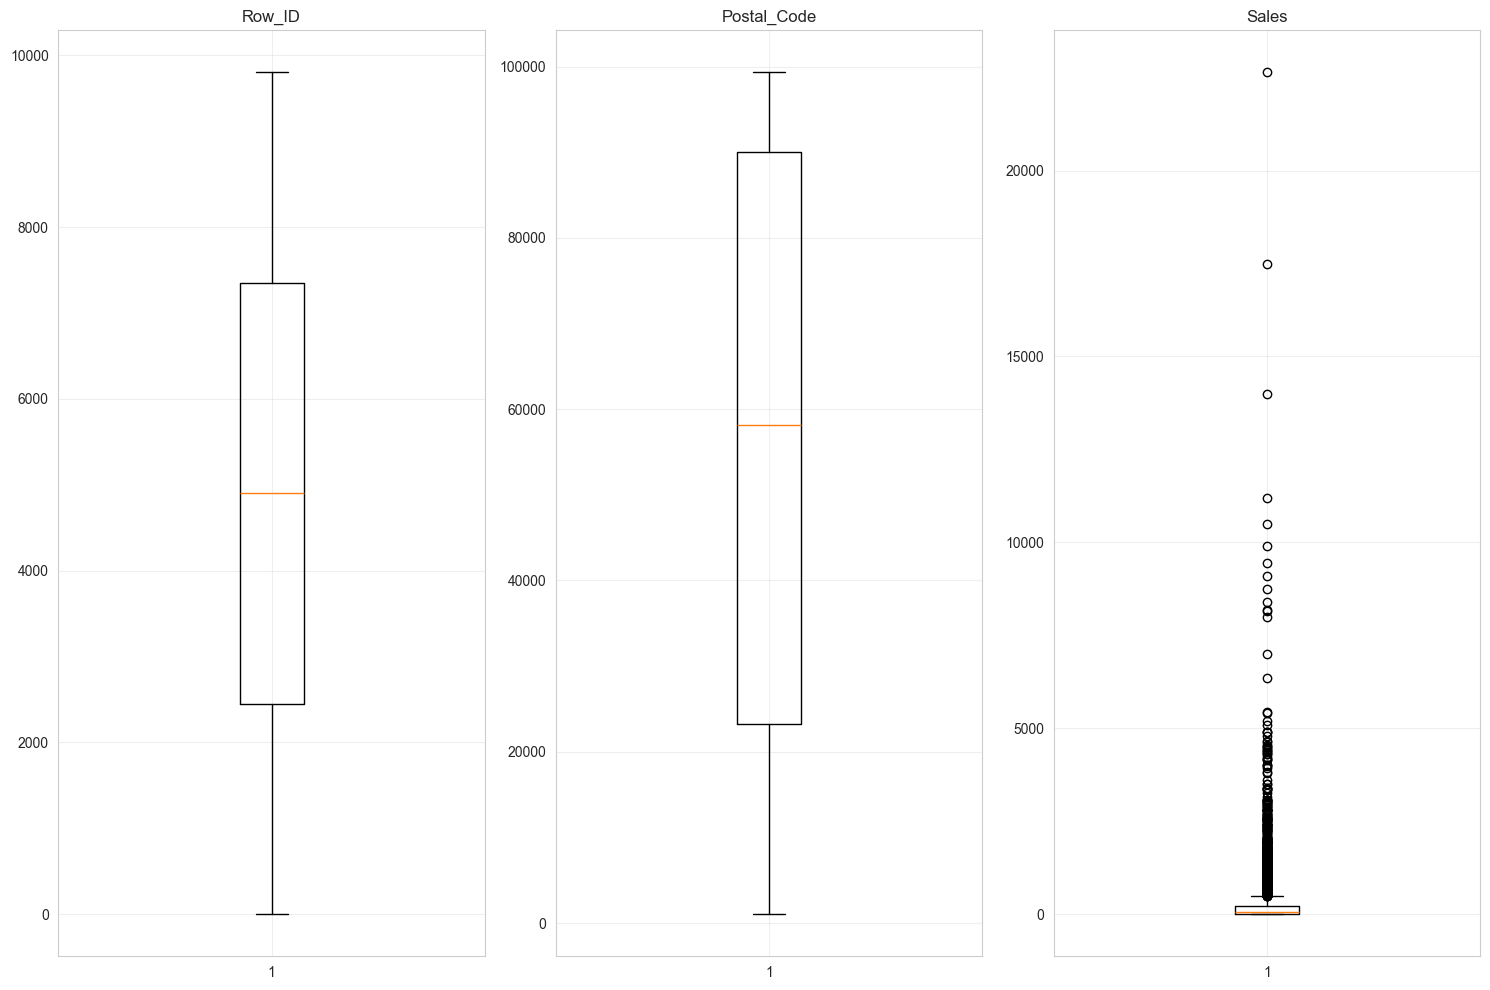

In [10]:
# Visualize outliers with boxplots
numeric_cols = df_superstore.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) > 0:
    fig = qc_superstore.plot_outliers_boxplot(numeric_cols[:6])  # First 6 numeric columns
    plt.show()

In [11]:
# Save quality report
os.makedirs('../outputs/reports', exist_ok=True)
qc_superstore.save_report('../outputs/reports/superstore_quality_report.md')

## 3. Load Online Retail Data

In [12]:
# Load Online Retail dataset
retail_path = '../data/raw/Online Retail.csv'
df_retail = pd.read_csv(retail_path, encoding='ISO-8859-1')

print(f"Online Retail Data Loaded")
print(f"Shape: {df_retail.shape}")
print(f"\nFirst few rows:")
df_retail.head()

Online Retail Data Loaded
Shape: (541909, 8)

First few rows:


,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
# Basic information
print("=== Online Retail Data Info ===")
df_retail.info()

=== Online Retail Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [14]:
# Statistical summary
df_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 4. Quality Assessment - Online Retail

In [15]:
# Initialize quality checker
qc_retail = DataQualityChecker(df_retail, "Online Retail")

# Run comprehensive quality check
report_retail = qc_retail.run_full_quality_check()

In [16]:
# Display missing values
print("\n=== Missing Values ===")
if len(report_retail['missing_values']) > 0:
    display(report_retail['missing_values'])
else:
    print("No missing values detected!")


=== Missing Values ===


,Column,Missing_Count,Missing_Percentage,Data_Type
6,CustomerID,135080,24.926694,float64
2,Description,1454,0.268311,object


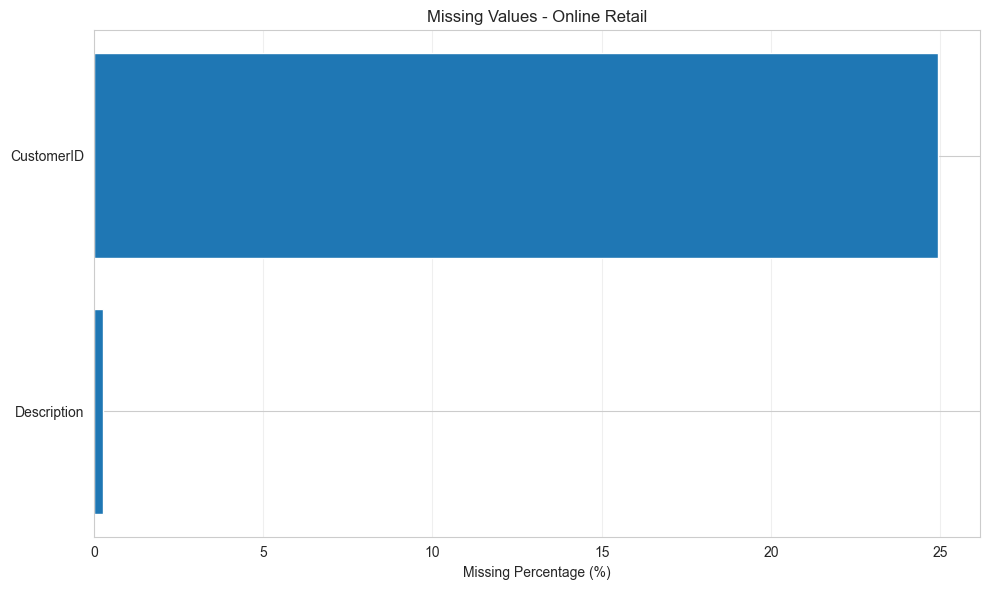

In [17]:
# Visualize missing values
fig = qc_retail.plot_missing_values()
if fig:
    plt.show()
else:
    print("No missing values to visualize")

In [18]:
# Display duplicate information
print("\n=== Duplicate Rows ===")
dup_info = report_retail['duplicates']
print(f"Total Duplicates: {dup_info['total_duplicates']:,}")
print(f"Percentage: {dup_info['duplicate_percentage']:.2f}%")
print(f"Unique Rows: {dup_info['unique_rows']:,}")


=== Duplicate Rows ===
Total Duplicates: 5,268
Percentage: 0.97%
Unique Rows: 536,641


In [19]:
# Check for outliers
print("\n=== Outliers (IQR Method) ===")
if 'outliers' in report_retail:
    for col, info in report_retail['outliers'].items():
        if info['count'] > 0:
            print(f"\n{col}:")
            print(f"  Count: {info['count']:,} ({info['percentage']:.2f}%)")
            print(f"  Valid range: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")
            if info['min_outlier'] and info['max_outlier']:
                print(f"  Outlier range: [{info['min_outlier']:.2f}, {info['max_outlier']:.2f}]")


=== Outliers (IQR Method) ===

Quantity:
  Count: 58,619 (10.82%)
  Valid range: [-12.50, 23.50]
  Outlier range: [-80995.00, 80995.00]

UnitPrice:
  Count: 39,627 (7.31%)
  Valid range: [-3.07, 8.45]
  Outlier range: [-11062.06, 38970.00]


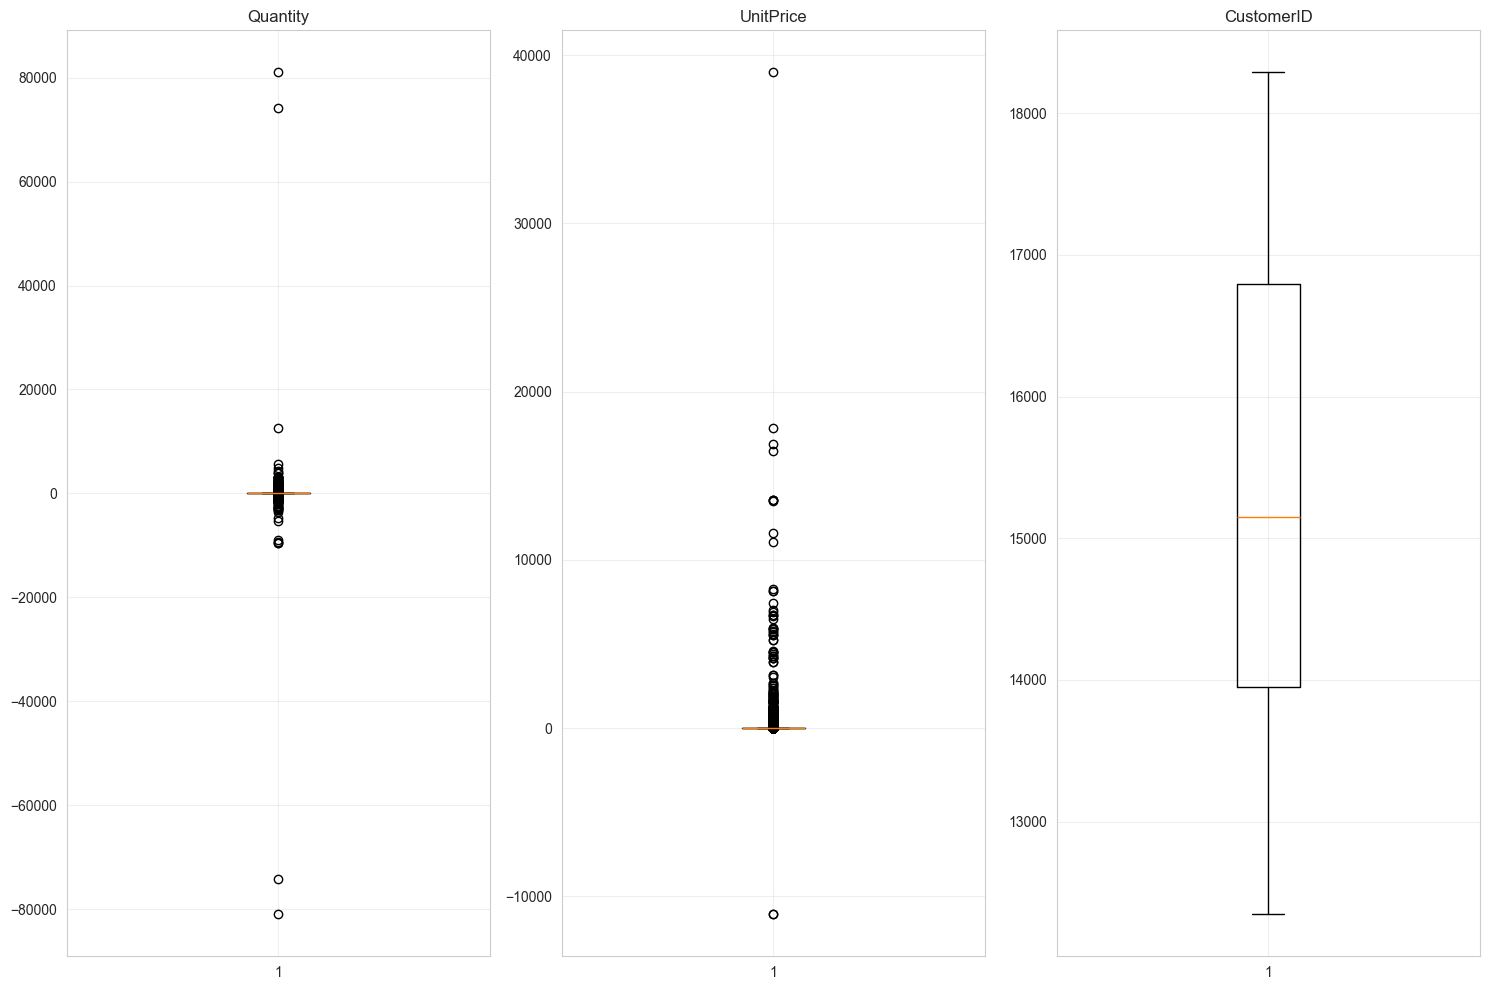

In [20]:
# Visualize outliers
numeric_cols_retail = df_retail.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols_retail) > 0:
    fig = qc_retail.plot_outliers_boxplot(numeric_cols_retail)
    plt.show()

In [21]:
# Save quality report
qc_retail.save_report('../outputs/reports/online_retail_quality_report.md')

## 5. Comparative Analysis

In [22]:
# Compare both datasets
comparison = pd.DataFrame({
    'Metric': ['Total Rows', 'Total Columns', 'Missing Values (%)', 'Duplicates (%)'],
    'Superstore': [
        f"{report_superstore['basic_info']['total_rows']:,}",
        report_superstore['basic_info']['total_columns'],
        f"{(report_superstore['missing_values']['Missing_Percentage'].sum() / report_superstore['basic_info']['total_columns'] if len(report_superstore['missing_values']) > 0 else 0):.2f}%",
        f"{report_superstore['duplicates']['duplicate_percentage']:.2f}%"
    ],
    'Online Retail': [
        f"{report_retail['basic_info']['total_rows']:,}",
        report_retail['basic_info']['total_columns'],
        f"{(report_retail['missing_values']['Missing_Percentage'].sum() / report_retail['basic_info']['total_columns'] if len(report_retail['missing_values']) > 0 else 0):.2f}%",
        f"{report_retail['duplicates']['duplicate_percentage']:.2f}%"
    ]
})

print("\n=== Dataset Comparison ===")
display(comparison)


=== Dataset Comparison ===


,Metric,Superstore,Online Retail
0,Total Rows,"9,800","541,909"
1,Total Columns,18,8
2,Missing Values (%),0.01%,3.15%
3,Duplicates (%),0.00%,0.97%


In [23]:
import pandas as pd
import os

files_to_check = [
    '../data/processed/cleaned_sales_final.csv',
    '../data/processed/monthly_sales_final.csv'
]

print("--- VS Code Final Logic Audit ---")
for file_path in files_to_check:
    if os.path.exists(file_path):
        temp_df = pd.read_csv(file_path)
        print(f"✅ {file_path} exists.")
        print(f"   - Row Count: {len(temp_df)}")
        print(f"   - Columns: {list(temp_df.columns)}")
        
        # Ensure the date range is correct (2015-2018)
        if 'order_date' in temp_df.columns:
            temp_df['order_date'] = pd.to_datetime(temp_df['order_date'])
            print(f"   - Date Range: {temp_df['order_date'].min().year} to {temp_df['order_date'].max().year}")
    else:
        print(f"❌ {file_path} is MISSING.")

--- VS Code Final Logic Audit ---
✅ ../data/processed/cleaned_sales_final.csv exists.
   - Row Count: 9800
   - Columns: ['order_id', 'order_date', 'customer_id', 'product_id', 'quantity', 'sales', 'region', 'unit_price', 'year', 'month', 'quarter', 'day_of_week', 'day_of_month', 'week_of_year', 'is_weekend', 'month_name', 'day_name', 'year_month', 'effective_price', 'revenue_per_item', 'quantity_category', 'revenue_category', 'first_purchase_date', 'last_purchase_date', 'transaction_count', 'order_count', 'total_revenue', 'avg_order_value', 'total_quantity', 'unique_products', 'recency_days', 'customer_lifetime_days', 'purchase_frequency', 'recency_score', 'monetary_score', 'frequency_score', 'total_product_revenue', 'popularity_score', 'unique_customers']
   - Date Range: 2015 to 2018
✅ ../data/processed/monthly_sales_final.csv exists.
   - Row Count: 48
   - Columns: ['order_date', 'sales']
   - Date Range: 2015 to 2018
